# Flight Price prediction
![](https://wonderfulengineering.com/wp-content/uploads/2014/05/airplane-wallpaper-2.jpg)

## Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.
Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

## Importing Libraries

In [67]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [68]:
df=pd.read_csv(r"D:\Flight Fare Prediction\artifacts\raw.csv")

* ## Explore dataset

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              13354 non-null  object 
 1   Airline          13354 non-null  object 
 2   Date_of_Journey  13354 non-null  object 
 3   Source           13354 non-null  object 
 4   Destination      13354 non-null  object 
 5   Route            13353 non-null  object 
 6   Dep_Time         13354 non-null  object 
 7   Arrival_Time     13354 non-null  object 
 8   Duration         13354 non-null  object 
 9   Total_Stops      13353 non-null  object 
 10  Additional_Info  13354 non-null  object 
 11  Price            10683 non-null  float64
dtypes: float64(1), object(11)
memory usage: 1.2+ MB


train_data have missing value.Lets check it

In [70]:
df.isnull().sum()

_id                   0
Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [71]:
df.dropna(inplace=True)

In [72]:
df.isnull().sum()

_id                0
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

* # Data Cleaning

In [73]:
# Checking if there are any Duplicate values
df[df.duplicated()]

,_id,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [74]:
# Drop duplicates value
df.drop_duplicates(keep='first',inplace=True)

In [75]:
# View the unique values or some examples to understand the format
print(df["Arrival_Time"].unique())

['23:30' '12:55' '13:15' ... '00:05 19 Mar' '06:50 10 Mar' '21:20 13 Mar']


In [76]:
df["Additional_Info"].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

Convert No Info in No info because both are same

In [77]:
df.shape

(10682, 12)

In [78]:
df["Additional_Info"] = df["Additional_Info"].replace({'No Info': 'No info'})

* # Feature Engineering ( Dividing data into features and labels)

In [79]:
# Duration convert hours in min.
df['Duration']=  df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [80]:
# Date_of_Journey
df["Journey_day"] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df["Journey_month"] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [81]:
#Dep_Time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"], format="%H:%M").dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"], format="%H:%M").dt.minute
df.drop(["Dep_Time"], axis=1, inplace=True)

In [82]:

# Extract only the time part from Arrival_Time
df["Arrival_Time"] = df["Arrival_Time"].str.extract(r'(\d{2}:\d{2})')  # Extract time part

# Convert to datetime, assuming the extracted time is in HH:MM format
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"], format="%H:%M", errors='coerce')

# Extract hour and minute
df["Arrival_hour"] = df["Arrival_Time"].dt.hour
df["Arrival_min"] = df["Arrival_Time"].dt.minute

# Drop the original Arrival_Time column
df.drop(["Arrival_Time"], axis=1, inplace=True)

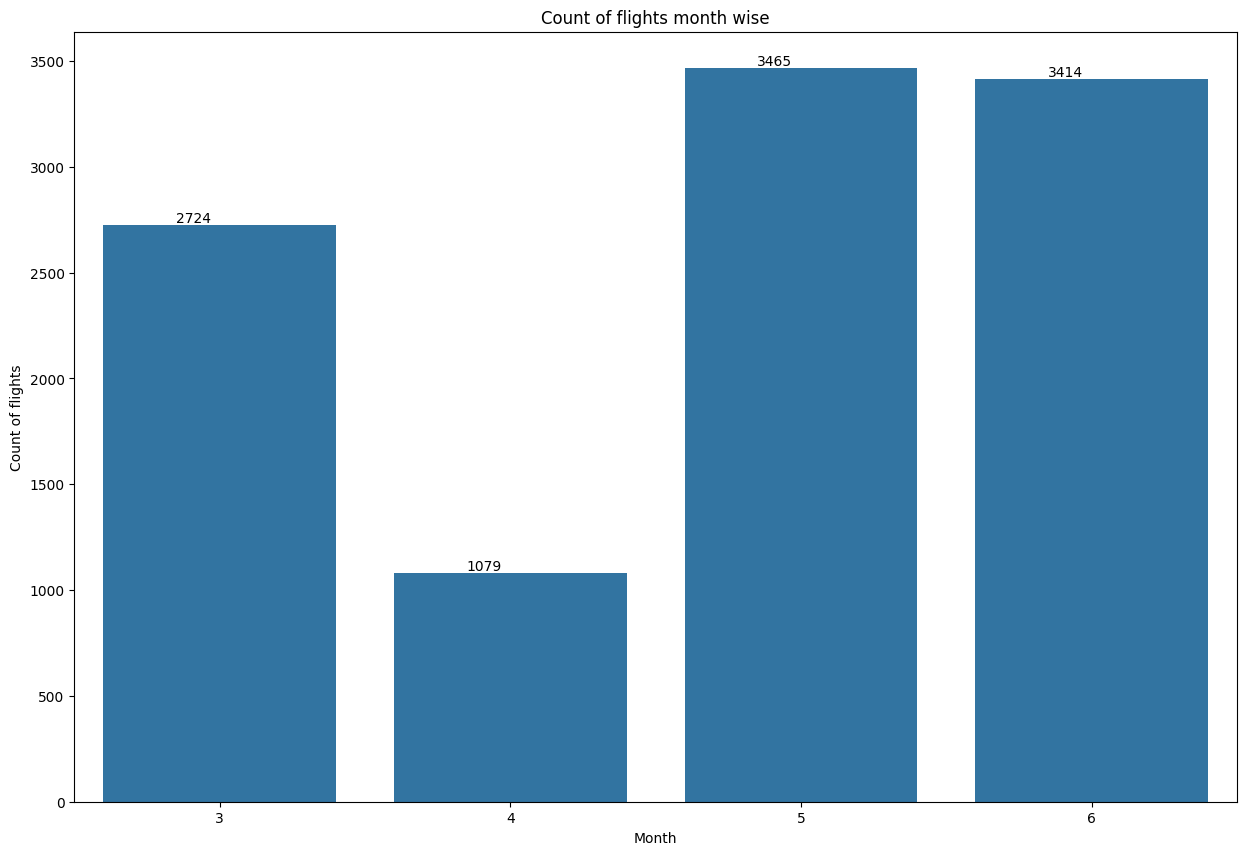

In [83]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [17]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops': 4})


In [18]:
df["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

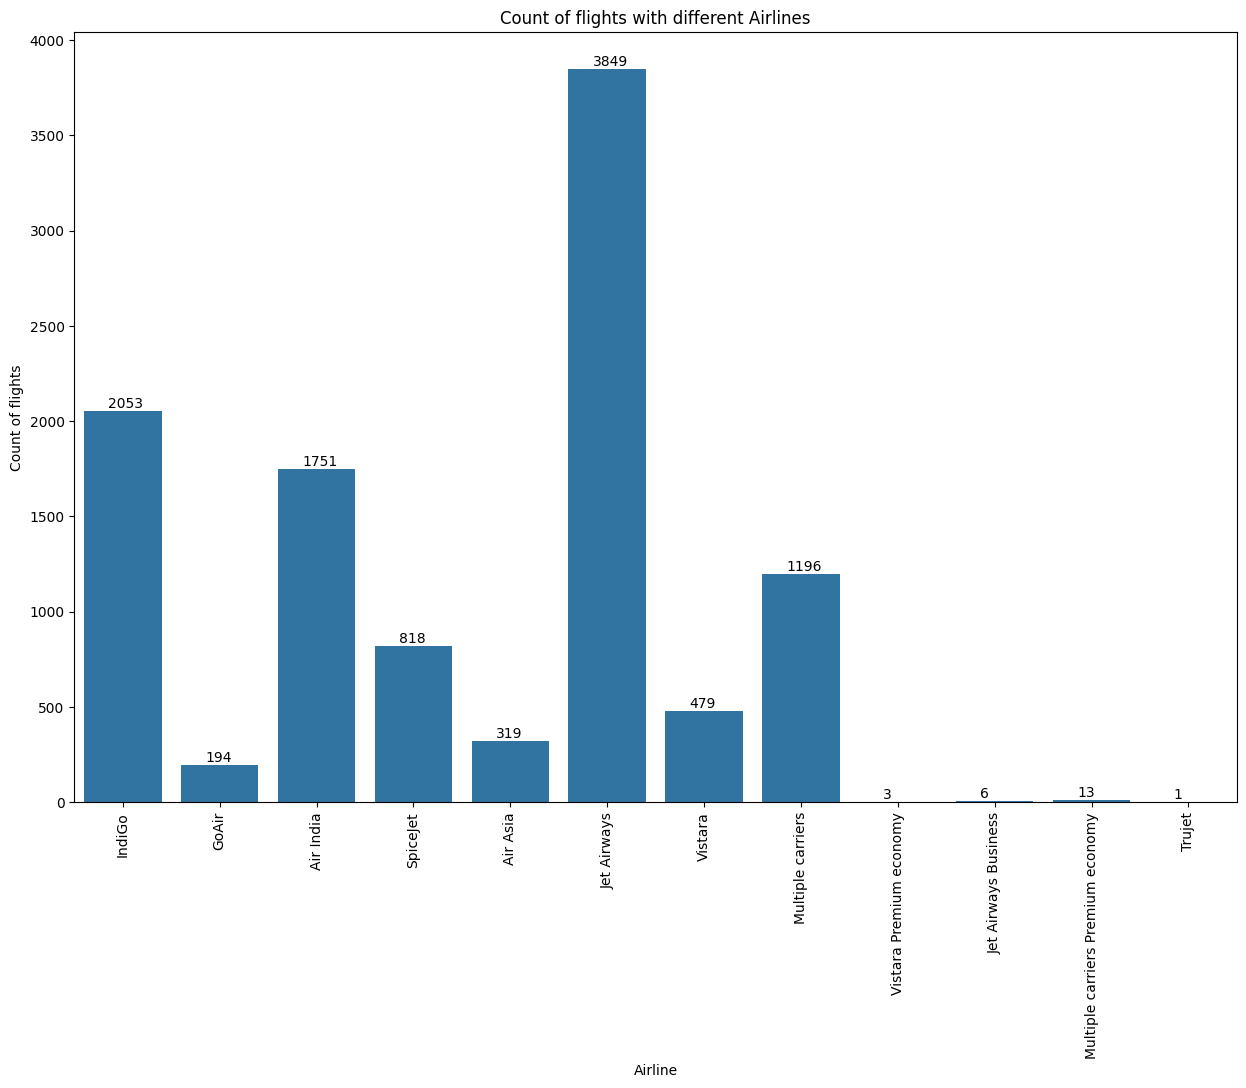

In [178]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

There are more number of flights of Jet Airways.

 Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'GoAir'),
  Text(2, 0, 'Air India'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Air Asia'),
  Text(5, 0, 'Jet Airways'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Multiple carriers'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

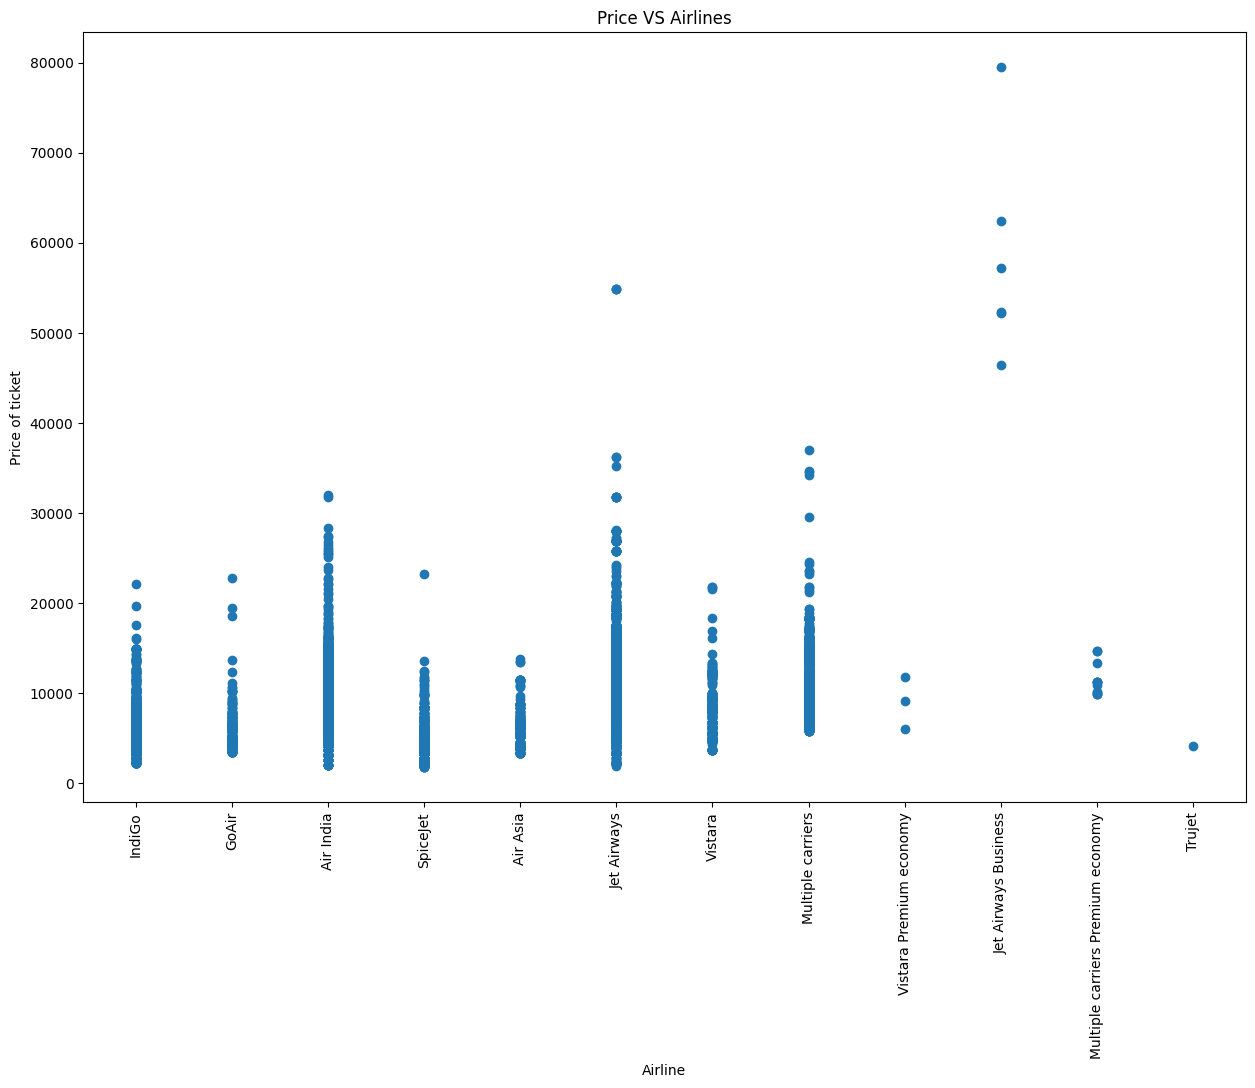

In [179]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)



The ticket rate for Jet Airways Business airline is high.

In [ ]:
# Airline
df["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)



#### From above scatter plot it is clear that the ticket prices for Business class is higher which is quite obivious.

In [181]:
df["Additional_Info"].value_counts()

Additional_Info
No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [182]:
# Additional_Info
df["Additional_Info"] = df["Additional_Info"].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   })


C:\Users\Abhi\AppData\Local\Temp\ipykernel_8944\3354437006.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Additional_Info"].replace({'Change airports':'Other',


In [183]:
df.head()

,_id,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,66c8625c1f6f777dbd0db918,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,325,1,No info,6218.0,12,5,18,5,23,30
1,66c8625c1f6f777dbd0db930,GoAir,Delhi,Cochin,DEL ? BOM ? COK,355,1,No info,7682.0,15,5,7,0,12,55
2,66c8625c1f6f777dbd0db916,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2,No info,7662.0,1,5,5,50,13,15
3,66c8625c1f6f777dbd0db944,Air India,Chennai,Kolkata,MAA ? CCU,135,0,No info,4667.0,3,5,11,40,13,55
4,66c8625c1f6f777dbd0db91a,SpiceJet,Kolkata,Banglore,CCU ? BLR,145,0,No info,3873.0,24,6,9,0,11,25


### Convert categorical data into numerical

In [184]:
data = df.drop(["Price"], axis=1)

In [185]:
categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
numerical_data = data.select_dtypes(include=['int64', 'float','int32'])



In [186]:
categorical_data.head()

,_id,Airline,Source,Destination,Route,Additional_Info
0,66c8625c1f6f777dbd0db918,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,No info
1,66c8625c1f6f777dbd0db930,GoAir,Delhi,Cochin,DEL ? BOM ? COK,No info
2,66c8625c1f6f777dbd0db916,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info
3,66c8625c1f6f777dbd0db944,Air India,Chennai,Kolkata,MAA ? CCU,No info
4,66c8625c1f6f777dbd0db91a,SpiceJet,Kolkata,Banglore,CCU ? BLR,No info


In [187]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_data = categorical_data.apply(LabelEncoder().fit_transform)


In [188]:
categorical_data.head()

,_id,Airline,Source,Destination,Route,Additional_Info
0,3,3,3,0,91,3
1,27,2,2,1,104,3
2,1,1,3,0,84,3
3,47,1,1,4,127,3
4,5,7,3,0,64,3


### **Concatenate both catagorical and numerical data**

In [189]:
X = pd.concat([categorical_data, numerical_data], axis=1)
y=df['Price']


In [190]:
X.head()

,_id,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,3,3,0,91,3,325,1,12,5,18,5,23,30
1,27,2,2,1,104,3,355,1,15,5,7,0,12,55
2,1,1,3,0,84,3,445,2,1,5,5,50,13,15
3,47,1,1,4,127,3,135,0,3,5,11,40,13,55
4,5,7,3,0,64,3,145,0,24,6,9,0,11,25


In [191]:
y.head()

0    6218.0
1    7682.0
2    7662.0
3    4667.0
4    3873.0
Name: Price, dtype: float64

## Our dataset is ready now!

#  Building Machine Learning Models

In [202]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import warnings
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [203]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [204]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    #"XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3399.9303
- Mean Absolute Error: 2449.4701
- R2 Score: 0.4445
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3552.3478
- Mean Absolute Error: 2452.9424
- R2 Score: 0.4528


Lasso
Model performance for Training set
- Root Mean Squared Error: 3399.9318
- Mean Absolute Error: 2449.2326
- R2 Score: 0.4445
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3552.4579
- Mean Absolute Error: 2452.7197
- R2 Score: 0.4528


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2990.4189
- Mean Absolute Error: 2067.1150
- R2 Score: 0.5703
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3881.5795
- Mean Absolute Error: 2563.4050
- R2 Score: 0.3467


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.000

In [205]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Random Forest Regressor,0.883693
3,Decision Tree,0.825649
5,AdaBoost Regressor,0.471752
0,Linear Regression,0.452836
1,Lasso,0.452802
2,K-Neighbors Regressor,0.346714


In [206]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize and fit the model
lin_model = RandomForestRegressor()
lin_model = lin_model.fit(X_train, y_train)

# Make predictions
y_pred = lin_model.predict(X_test)

# Calculate the R2 score
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 88.60


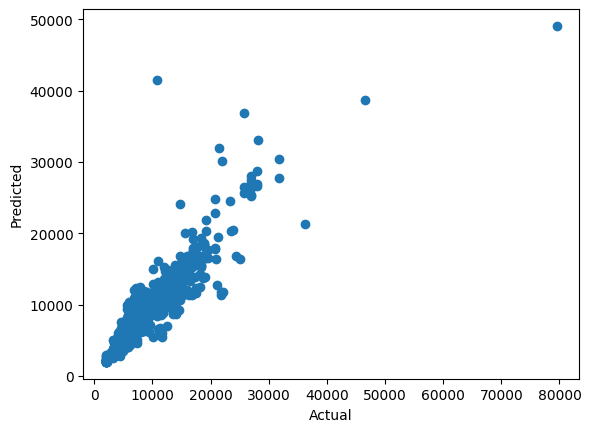

In [207]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [208]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
6075,4667.0,4650.81,16.19
3544,4991.0,4427.27,563.73
9291,10919.0,10919.00,0.00
5032,4823.0,4873.84,-50.84
2483,5755.0,4093.75,1661.25
...,...,...,...
9797,6171.0,6669.12,-498.12
9871,5911.0,5225.43,685.57
10063,3175.0,3723.65,-548.65
8802,8610.0,8650.25,-40.25


In [210]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [ ]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

In [212]:
# best parameter
rf_random.best_params_

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20}

In [213]:
#predicting the values
prediction = rf_random.predict(X_test)

In [214]:
r2_score(y_test,prediction)

0.9013265180730188